In [568]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [569]:
# Importing the csv file from pc. 
file_path = 'E:/UNCC/UNCC ML/D3.csv'
sample = pd.DataFrame(pd.read_csv(file_path))
sample.head()

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [570]:
# Creating different array for the four columns
X_0 = sample.values[:,0]
X_1 = sample.values[:,1]
X_2 = sample.values[:,2]
y = sample.values[:,3]
# Printing the first 5 values of the arrays and number of data points
print('X_0 = ', X_0[:5])
print('X_1 = ', X_1[:5])
print('X_2 = ', X_2[:5])
print('y = ', y[:5])
m = len(X_1)
n = len(y)
print('m = ', m)
print('n = ', n)

X_0 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
X_1 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
X_2 =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100
n =  100


In [571]:
# Assuming a linear equation y = w0x0 + w1x1 +w2x2 + w3x3
# Initiation an array to hold the value of x_0 variable
a_0 = np.ones((m, 1))
a_0[:3]

array([[1.],
       [1.],
       [1.]])

In [572]:
# Initiation arrays to hold the value of x variable from each column
a_x0_1 = X_0.reshape(m,1)
a_x1_1 = X_1.reshape(m,1)
a_x2_1 = X_2.reshape(m,1)

In [573]:
# Creating a matrix for all x variable
a_x0 = np.hstack((a_0, a_x0_1,  a_x1_1, a_x2_1))
print('5 values of x variables for 1st column: \n', a_x0[:5])

5 values of x variables for 1st column: 
 [[1.         0.         3.44       0.44      ]
 [1.         0.04040404 0.1349495  0.88848485]
 [1.         0.08080808 0.82989899 1.3369697 ]
 [1.         0.12121212 1.52484848 1.78545454]
 [1.         0.16161616 2.21979798 2.23393939]]


In [574]:
# Setting the values of the coefficient w
w = np.zeros(4)
w

array([0., 0., 0., 0.])

In [575]:
# Creating a function for error calculation
def error_calculation(a, y, w):
    predictions = a.dot(w)
    difference = np.subtract(predictions,y)
    error = 1/(2*m)*np.sum(np.square(difference))
    return error  

In [576]:
# Testing the error for initial values of w
error_x0 = error_calculation(a_x0, y, w) 
print(f'The error considering all x values: {error_x0: .3f}') 

The error considering all x values:  5.524


In [577]:
# Creating a function to calculate the gradients for a given number of iteration and learning rate
def gradient(a, y, w, alpha, iteration):
    m = len(y)
    error_per_iter = np.zeros(iterations)
    for i in range(iterations):
        predictions = a.dot(w)
        difference = np.subtract(predictions,y)
        grad = (alpha/m)*a.transpose().dot(difference)
        w -= grad
        error_per_iter[i] = error_calculation(a, y, w)
    return w, error_per_iter

In [578]:
# Calculation for the x values learning rate 0.1
iterations = 1500 # Number of iteration 
alpha0 = 0.1 # Learning rate
theta0, iter_history0 = gradient(a_x0, y, w, alpha0, iterations) 
print('Final value of theta 0 =', theta0) 
print('iter_history_0 =', iter_history0) 
print(f'Final error for learning rate 0.1 = {iter_history0[-1]: .3f}') 

Final value of theta 0 = [ 5.31416563 -2.00371905  0.53256359 -0.26560164]
iter_history_0 = [4.13064348 3.51770697 3.12758306 ... 0.73846424 0.73846424 0.73846424]
Final error for learning rate 0.1 =  0.738


In [579]:
# Calculation for the x values learning rate 0.01
iterations = 1500 # Number of iteration 
alpha1 = 0.01 # Learning rate
theta1, iter_history1 = gradient(a_x0, y, w, alpha1, iterations) 
print('Final value of theta 1 =', theta1) 
print('iter_history_1 =', iter_history1) 
print(f'Final error for learning rate 0.01 = {iter_history1[-1]: .3f}') 

Final value of theta 1 = [ 5.31416683 -2.00371922  0.53256339 -0.26560181]
iter_history_1 = [0.73846424 0.73846424 0.73846424 ... 0.73846424 0.73846424 0.73846424]
Final error for learning rate 0.01 =  0.738


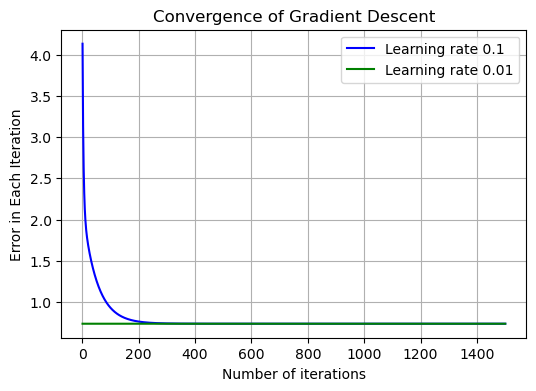

In [580]:
# Plot of error vs iteration for all three values of x
plt.plot(range(1, iterations + 1), iter_history0, color='blue', label='Learning rate 0.1') 
plt.plot(range(1, iterations + 1), iter_history1, color='green', label='Learning rate 0.01') 
plt.rcParams["figure.figsize"] = (6, 4) 
plt.grid(True) 
plt.xlabel('Number of iterations') 
plt.ylabel('Error in Each Iteration') 
plt.title('Convergence of Gradient Descent') 
plt.legend()
plt.show() 

In [581]:
global t
t = theta0
def func(x1,x2,x3):
    y=theta0[0]*1+theta0[1]*x1+theta0[2]*x2+theta0[3]*x3
    return y    

In [582]:
a = func(1,1,1)
print(f'Prediction for (1, 1, 1): {a: .3f}')
a = func(2,0,4)
print(f'Prediction for (2, 0, 4): {a: .3f}')
a = func(3,2,1)
print(f'Prediction for (3, 2, 1): {a: .3f}')

Prediction for (1, 1, 1):  3.577
Prediction for (2, 0, 4):  0.244
Prediction for (3, 2, 1):  0.103
